## This file is to prove the code used in blender with some graphs of the desired and estimated position of the end effector for 3 DOF Robotic Arm


In [2]:
import numpy as np
import math
#import bpy

#pi=math.pi


import time

from sympy import sin, cos, pi

from sympy import *

L1= symbols('L1') # robot link1 length
L2= symbols('L2') # robot link2 length
L3= symbols('L3') # robot link3 length
#import mathutils
#pi=math.pi


In [3]:
### Your FK code here
# Create symbols
d1, d2, d3 = symbols('d1:4') # link offset
a1, a2, a3 = symbols('a1:4') # link length
alpha1,alpha2,alpha3 = symbols('alpha1:4')# twist angle
q1, q2, q3 = symbols('q1:4') # joint angle


In [4]:
# Create Modified DH parameters
# The DH - table for the 3 DOF will be using also 3 rows but with different convension or different way and we use a different trasformation matrix (The other format)

DH_Table = {
            alpha1: pi/2, a1:0,     d1:    L1,    q1: q1,
            alpha2: 0,    a2:L2,    d2:    0,     q2: q2,
            alpha3: 0,    a3: L3,   d3:    0,     q3: q3,
}

In [5]:
# This is the corresponding Matrix for the transformation (The other format)

def TF_Matrix(alpha,a,d,q):
    TF = Matrix([
                [cos(q), -sin(q)*cos(alpha), sin(q)*sin(alpha), a*cos(q)],
                [sin(q),cos(q)*cos(alpha),-cos(q)*sin(alpha), a*sin(q)],
                [0, sin(alpha), cos(alpha), d],
                [0, 0, 0,1]])
    return TF

In [6]:
T0_1 = TF_Matrix(alpha1, a1,d1,q1).subs(DH_Table)
T1_2 = TF_Matrix(alpha2, a2,d2,q2).subs(DH_Table)
T2_3 = TF_Matrix(alpha3, a3,d3,q3).subs(DH_Table)
display(T0_1)
display(T1_2)
display(T2_3)

Matrix([
[cos(q1), 0,  sin(q1),  0],
[sin(q1), 0, -cos(q1),  0],
[      0, 1,        0, L1],
[      0, 0,        0,  1]])

Matrix([
[cos(q2), -sin(q2), 0, L2*cos(q2)],
[sin(q2),  cos(q2), 0, L2*sin(q2)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

Matrix([
[cos(q3), -sin(q3), 0, L3*cos(q3)],
[sin(q3),  cos(q3), 0, L3*sin(q3)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

In [7]:
T0_3=simplify(T0_1*T1_2*T2_3)
display(T0_3)

Matrix([
[cos(q1)*cos(q2 + q3), -sin(q2 + q3)*cos(q1),  sin(q1), (L2*cos(q2) + L3*cos(q2 + q3))*cos(q1)],
[sin(q1)*cos(q2 + q3), -sin(q1)*sin(q2 + q3), -cos(q1), (L2*cos(q2) + L3*cos(q2 + q3))*sin(q1)],
[        sin(q2 + q3),          cos(q2 + q3),        0,      L1 + L2*sin(q2) + L3*sin(q2 + q3)],
[                   0,                     0,        0,                                      1]])

In [8]:
EEFx= symbols('EEFx') # robot link1 length
EEFy= symbols('EEFy') # robot link1 length
EEFz= symbols('EEFy') # robot link1 length

EEFx=T0_3[0,3]
EEFy=T0_3[1,3]
EEFz=T0_3[2,3]

# These are the corresponding x,y and z coordinates of the end effector and they are the right ones and we could prove that from the geometry easily
display(EEFx)
display(EEFy)
display(EEFz)

(L2*cos(q2) + L3*cos(q2 + q3))*cos(q1)

(L2*cos(q2) + L3*cos(q2 + q3))*sin(q1)

L1 + L2*sin(q2) + L3*sin(q2 + q3)

In [9]:
Jac00=diff(EEFx,q1)
Jac01=diff(EEFx,q2)
Jac02=diff(EEFx,q3)
Jac10=diff(EEFy,q1)
Jac11=diff(EEFy,q2)
Jac12=diff(EEFy,q3)
Jac20=diff(EEFz,q1)
Jac21=diff(EEFz,q2)
Jac22=diff(EEFz,q3)

Jac=Matrix([[Jac00, Jac01, Jac02],[Jac10, Jac11,  Jac12],[Jac20, Jac21,  Jac22]])
simplify(Jac)

Matrix([
[-(L2*cos(q2) + L3*cos(q2 + q3))*sin(q1), -(L2*sin(q2) + L3*sin(q2 + q3))*cos(q1), -L3*sin(q2 + q3)*cos(q1)],
[ (L2*cos(q2) + L3*cos(q2 + q3))*cos(q1), -(L2*sin(q2) + L3*sin(q2 + q3))*sin(q1), -L3*sin(q1)*sin(q2 + q3)],
[                                      0,            L2*cos(q2) + L3*cos(q2 + q3),          L3*cos(q2 + q3)]])

In [10]:
def JacInv(Jac):
    return simplify(Jac.inv())

In [ ]:
'''
eefxr=[1,1.05,1.4,1.45]

eefyr=[0,0.05,0.7,0.75]

eefzr=[2,2.05,2.2,2.25]
'''

In [84]:
jacobian_inverse=JacInv(Jac)

tnew= np.linspace(0, 3, num=101, endpoint=True)

eefxr=[1,1.05,1.4,1.41]

eefyr=[0,0.05,0.7,0.71]

eefzr=[2,2.05,2.2,2.21]

t=[0,0.5,2.5,3]


zx = np.polyfit(t, eefxr, 4)
fx = np.poly1d(zx)

zy = np.polyfit(t, eefyr, 4)
fy = np.poly1d(zy)

zz = np.polyfit(t, eefzr, 4)
fz = np.poly1d(zz)


/home/khaled/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/khaled/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/khaled/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


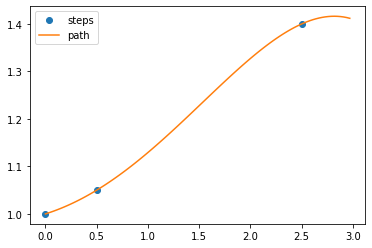

In [85]:
import matplotlib.pyplot as plt
plt.plot(t[:-1], eefxr[:-1], 'o', tnew[:-1], fx(tnew[:-1]), '-')
plt.legend(['steps', 'path'], loc='best')
plt.show()

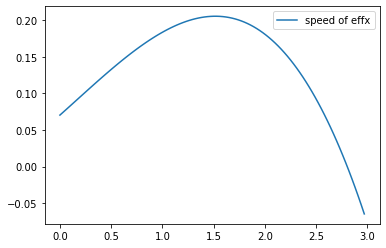

In [86]:
plt.plot(tnew[:-1],np.diff(fx(tnew),axis=0)/np.diff(tnew,axis=0))
plt.legend(['speed of effx'], loc='best')

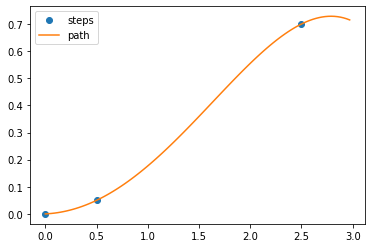

In [87]:
plt.plot(t[:-1], eefyr[:-1], 'o', tnew[:-1], fy(tnew[:-1]), '-')
plt.legend(['steps', 'path'], loc='best')
plt.show()

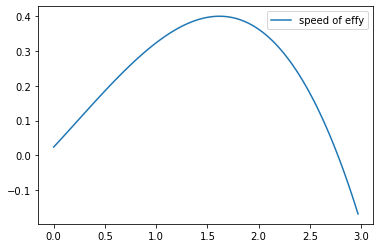

In [88]:
plt.plot(tnew[:-1],np.diff(fy(tnew),axis=0)/np.diff(tnew,axis=0))
plt.legend(['speed of effy'], loc='best')


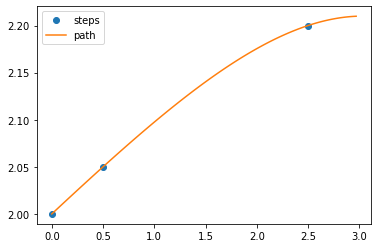

In [89]:
plt.plot(t[:-1], eefzr[:-1], 'o', tnew[:-1], fz(tnew[:-1]), '-')
plt.legend(['steps', 'path'], loc='best')
plt.show()

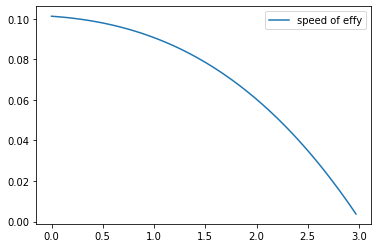

In [90]:
plt.plot(tnew[:-1],np.diff(fz(tnew),axis=0)/np.diff(tnew,axis=0))
plt.legend(['speed of effy'], loc='best')

In [91]:

import numpy as np
delta_effx=np.diff(fx(tnew),axis=0)
delta_effy=np.diff(fy(tnew),axis=0)
delta_effz=np.diff(fz(tnew),axis=0)
# inverse kinematics loop
x_val=1
y_val=0
z_val=2

q1_val = 0
q2_val=pi/2
q3_val=-pi/2

estimated_eefx=[]
estimated_eefy=[]
estimated_eefz=[]


for ite in range(len(tnew)-1):
    #print(ite)
    jac_inv_value=jacobian_inverse.evalf(subs={q1: q1_val,q2:q2_val,q3: q3_val,L1:1,L2:1,L3:1})
    #print(jac_inv_value)
    delta_q=jac_inv_value.dot(np.asarray([delta_effx[ite],delta_effy[ite],delta_effz[ite]]))
    q1_val=q1_val+delta_q[0]
    q2_val=q2_val+delta_q[1]
    q3_val=q3_val+delta_q[2]
    
    estimated_eefx.append(EEFx.evalf(subs={q1: q1_val,q2:q2_val,q3: q3_val,L1:1,L2:1,L3:1}))
    estimated_eefy.append(EEFy.evalf(subs={q1: q1_val,q2:q2_val,q3: q3_val,L1:1,L2:1,L3:1}))
    estimated_eefz.append(EEFz.evalf(subs={q1: q1_val,q2:q2_val,q3: q3_val,L1:1,L2:1,L3:1}))

/home/khaled/.local/lib/python3.8/site-packages/sympy/matrices/matrices.py:1353: SymPyDeprecationWarning: 

Dot product of non row/column vectors has been deprecated since SymPy
1.2. Use * to take matrix products instead. See
https://github.com/sympy/sympy/issues/13815 for more info.

  SymPyDeprecationWarning(


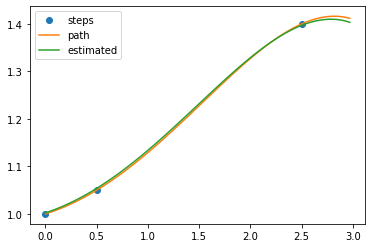

In [92]:
plt.plot(t[:-1], eefxr[:-1], 'o', tnew[:-1], fx(tnew[:-1]), '-',tnew[:-1], estimated_eefx, '-')
plt.legend(['steps', 'path','estimated'], loc='best')
plt.show()

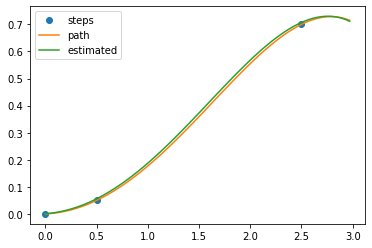

In [93]:
plt.plot(t[:-1], eefyr[:-1], 'o', tnew[:-1], fy(tnew[:-1]), '-',tnew[:-1], estimated_eefy, '-')
plt.legend(['steps', 'path','estimated'], loc='best')
plt.show()

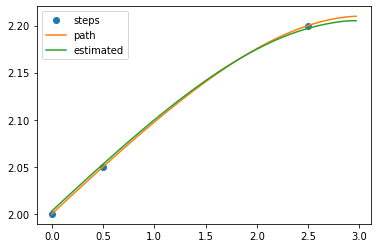

In [94]:
plt.plot(t[:-1], eefzr[:-1], 'o', tnew[:-1], fz(tnew[:-1]), '-',tnew[:-1], estimated_eefz, '-')
plt.legend(['steps', 'path','estimated'], loc='best')
plt.show()